#Ford Car Price Prediction

The ford.csv dataset consists of 17,966 entries and 9 columns, representing data related to Ford cars. Here is an overview of the columns:

1.model: The car's model (e.g., Fiesta, Focus) - categorical data.




2.year: The year of manufacture - numerical data.




3.price: The price of the car in the dataset - numerical data.



4.transmission: The type of transmission (e.g., Automatic, Manual) - categorical data.



5.mileage: The total miles driven by the car - numerical data.



6.fuelType: The type of fuel the car uses (e.g., Petrol, Diesel) - categorical data.



7.tax: The car's annual tax - numerical data.



8.mpg: Miles per gallon (fuel efficiency) - numerical data.




9.engineSize: The engine size in liters - numerical data.



This dataset can be used to analyze factors that affect the pricing of Ford cars, such as the model, year, fuel type, and engine size

#Data Analysis

In [2]:
import pandas as pd
df = pd.read_csv("/content/ford.csv")

In [3]:
df.head()

,model,year,price,transmission,mileage,fuelType,tax,mpg,engineSize
0,Fiesta,2017,12000,Automatic,15944,Petrol,150,57.7,1.0
1,Focus,2018,14000,Manual,9083,Petrol,150,57.7,1.0
2,Focus,2017,13000,Manual,12456,Petrol,150,57.7,1.0
3,Fiesta,2019,17500,Manual,10460,Petrol,145,40.3,1.5
4,Fiesta,2019,16500,Automatic,1482,Petrol,145,48.7,1.0


In [4]:
df.shape

(17966, 9)

In [5]:
df.tail()

,model,year,price,transmission,mileage,fuelType,tax,mpg,engineSize
17961,B-MAX,2017,8999,Manual,16700,Petrol,150,47.1,1.4
17962,B-MAX,2014,7499,Manual,40700,Petrol,30,57.7,1.0
17963,Focus,2015,9999,Manual,7010,Diesel,20,67.3,1.6
17964,KA,2018,8299,Manual,5007,Petrol,145,57.7,1.2
17965,Focus,2015,8299,Manual,5007,Petrol,22,57.7,1.0


In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17966 entries, 0 to 17965
Data columns (total 9 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   model         17966 non-null  object 
 1   year          17966 non-null  int64  
 2   price         17966 non-null  int64  
 3   transmission  17966 non-null  object 
 4   mileage       17966 non-null  int64  
 5   fuelType      17966 non-null  object 
 6   tax           17966 non-null  int64  
 7   mpg           17966 non-null  float64
 8   engineSize    17966 non-null  float64
dtypes: float64(2), int64(4), object(3)
memory usage: 1.2+ MB


#Cleaning and Preprocessing

In [7]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
df["model"] = le.fit_transform(df["model"])
le2 = LabelEncoder()
df["transmission"] = le2.fit_transform(df["transmission"])
le3 = LabelEncoder()
df["fuelType"] = le3.fit_transform(df["fuelType"])

In [8]:
df

,model,year,price,transmission,mileage,fuelType,tax,mpg,engineSize
0,5,2017,12000,0,15944,4,150,57.7,1.0
1,6,2018,14000,1,9083,4,150,57.7,1.0
2,6,2017,13000,1,12456,4,150,57.7,1.0
3,5,2019,17500,1,10460,4,145,40.3,1.5
4,5,2019,16500,0,1482,4,145,48.7,1.0
...,...,...,...,...,...,...,...,...,...
17961,0,2017,8999,1,16700,4,150,47.1,1.4
17962,0,2014,7499,1,40700,4,30,57.7,1.0
17963,6,2015,9999,1,7010,0,20,67.3,1.6
17964,11,2018,8299,1,5007,4,145,57.7,1.2


In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17966 entries, 0 to 17965
Data columns (total 9 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   model         17966 non-null  int64  
 1   year          17966 non-null  int64  
 2   price         17966 non-null  int64  
 3   transmission  17966 non-null  int64  
 4   mileage       17966 non-null  int64  
 5   fuelType      17966 non-null  int64  
 6   tax           17966 non-null  int64  
 7   mpg           17966 non-null  float64
 8   engineSize    17966 non-null  float64
dtypes: float64(2), int64(7)
memory usage: 1.2 MB


In [10]:
df.isnull().any()

,0
model,False
year,False
price,False
transmission,False
mileage,False
fuelType,False
tax,False
mpg,False
engineSize,False


In [11]:
dpl_rows = df.duplicated().sum()
print(dpl_rows)

154


In [12]:
df = df.drop_duplicates()

In [13]:
dpl_rows = df.duplicated().sum()
print(dpl_rows)

0


model


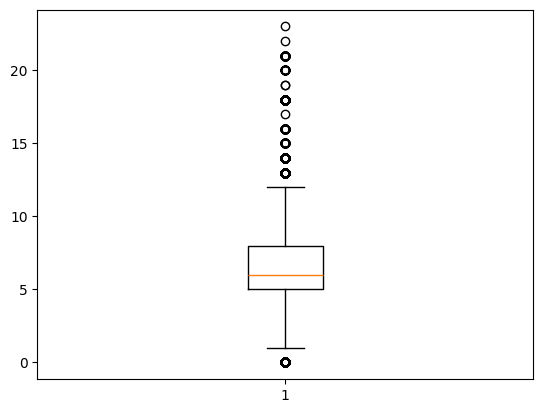

year


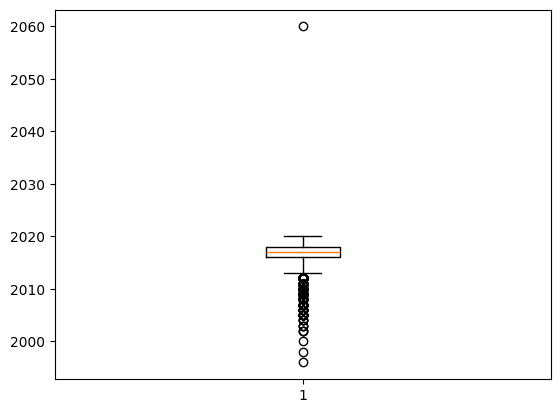

price


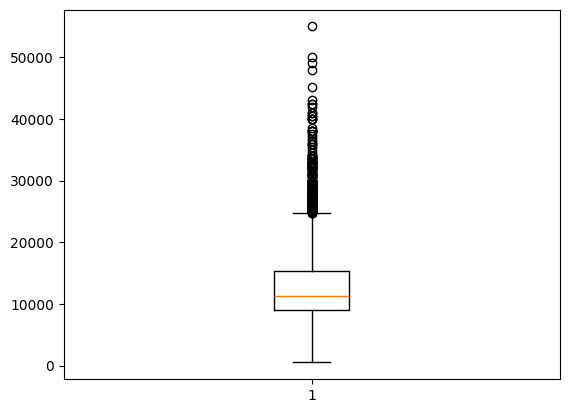

transmission


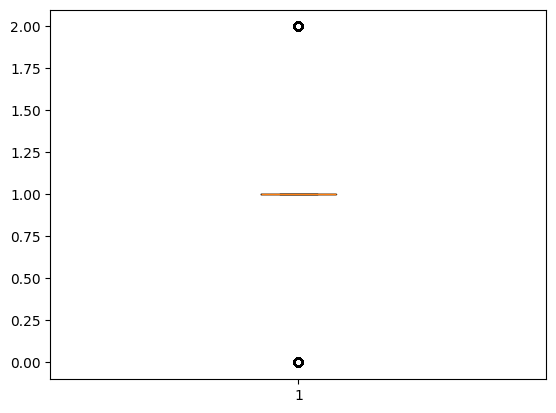

mileage


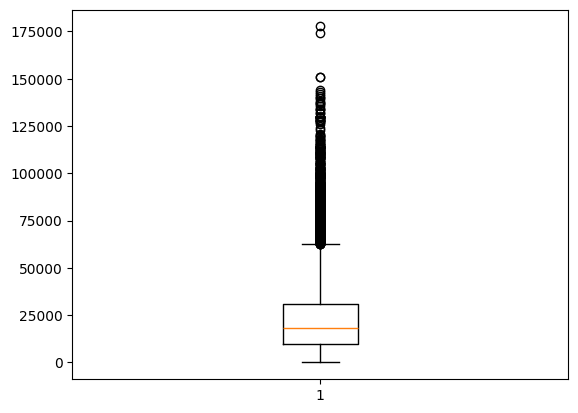

fuelType


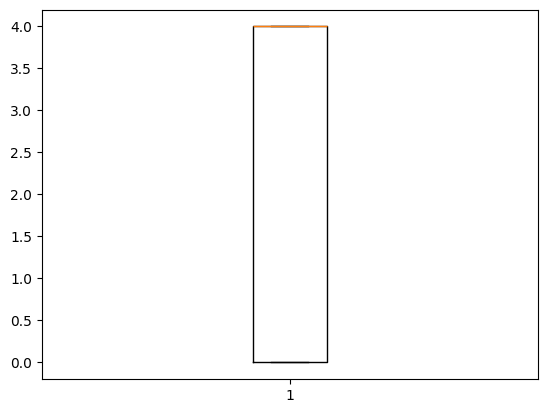

tax


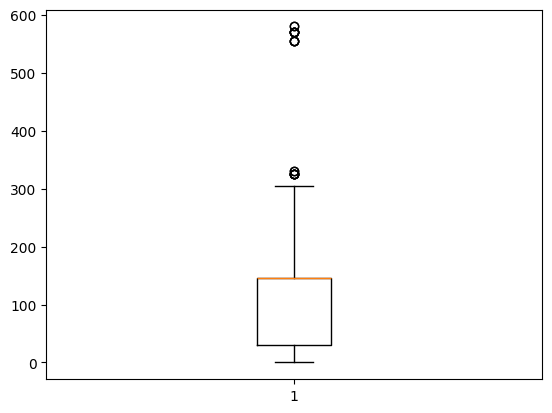

mpg


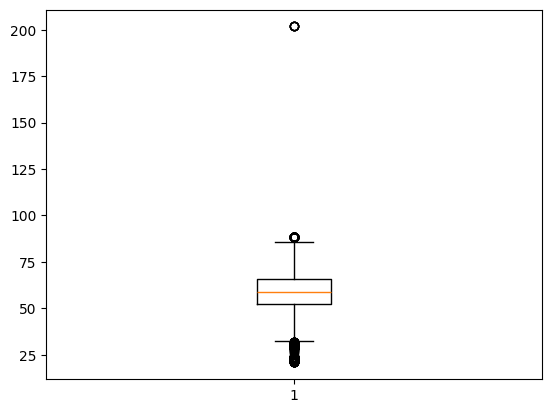

engineSize


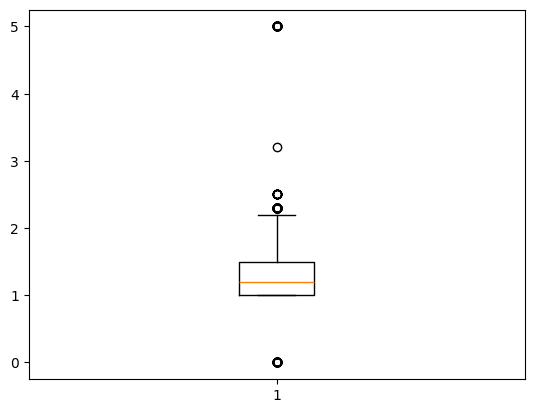

In [14]:
import matplotlib.pyplot as plt
for i in df.columns:
  print(i)
  plt.boxplot(x=df[i])
  plt.show()

In [15]:
lst = ["transmission","year","fuelType"]
for i in lst:
  Q1 = df[i].quantile(0.25)
  Q3 = df[i].quantile(0.75)
  IQR = Q3 - Q1
  lower_bound = Q1 - 1.5 * IQR
  df = df[(df[i] >= lower_bound)]

#Splitting

In [16]:
x = df.drop("price",axis=1)
y = df["price"]
x.head()
y.head()
y.value_counts()

,count
price,
10000,160
11000,146
10500,138
12000,113
9000,109
...,...
10198,1
5777,1
17345,1


In [17]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.25,random_state=0)

#Standardization

In [18]:
from sklearn.preprocessing import StandardScaler
sd = StandardScaler()
x_train = sd.fit_transform(x_train)
x_test = sd.fit_transform(x_test)

#Decision tree

In [19]:
from sklearn.tree import DecisionTreeRegressor
dt = DecisionTreeRegressor()
dt.fit(x_train,y_train)
y_pred = dt.predict(x_test)
y_pred

array([12790.,  9995., 11000., ...,  8240., 26698.,  9291.])

In [20]:
train_score = dt.score(x_train,y_train)
train_score

0.9997050976131681

In [21]:
test_score = dt.score(x_test,y_test)
test_score

0.8694075604813969

In [22]:
from sklearn.metrics import r2_score
r2_dt = r2_score(y_test,y_pred)
r2_dt

0.8694075604813969

In [23]:
from sklearn.metrics import mean_squared_error
mse_tree = mean_squared_error(y_test, y_pred)
mse_tree

2420214.333458271

#KNN

In [24]:
from sklearn.neighbors import KNeighborsRegressor
knn = KNeighborsRegressor(n_neighbors=7)
knn.fit(x_train, y_train)
y_pred2 = knn.predict(x_test)
y_pred2

array([12985.57142857,  9878.28571429,  9775.28571429, ...,
        9723.57142857, 33169.42857143,  9689.14285714])

In [25]:
train_score2 = knn.score(x_train,y_train)
train_score2

0.938078094327605

In [26]:
test_score2 = knn.score(x_test,y_test)
test_score2

0.9136699703971611

In [27]:
from sklearn.metrics import r2_score
r2_knn = r2_score(y_test, y_pred2)
r2_knn

0.9136699703971611

In [28]:
from sklearn.metrics import mean_squared_error
mse_knn = mean_squared_error(y_test, y_pred2)
mse_knn

1599917.849937276

#Linear Regression

In [29]:
from sklearn.linear_model import LinearRegression
lre = LinearRegression()
lre.fit(x_train,y_train)
y_pred3 = lre.predict(x_test)
y_pred3

array([13815.12445101, 12134.81027887, 13723.10981487, ...,
        8489.1633162 , 22910.11185217, 16158.65268591])

In [30]:
training_score3 = lre.score(x_train,y_train)
training_score3

0.7340427218293575

In [31]:
testing_score3 = lre.score(x_test,y_test)
testing_score3

0.7193317051943235

In [32]:
from sklearn.metrics import r2_score
r2_lin_re = r2_score(y_test, y_pred3)
r2_lin_re

0.7193317051943235

In [33]:
from sklearn.metrics import mean_squared_error
mse_linre = mean_squared_error(y_test, y_pred3)
mse_linre

5201506.55382485

#Support vector machine

#Support Vector Machine - Linear

In [34]:
from sklearn.svm import SVR
lin = SVR(kernel = 'linear')
lin.fit(x_train,y_train)
y_pred4 = lin.predict(x_test)
y_pred4

array([13447.2551528 , 12219.5430417 , 12200.54522639, ...,
        8915.969742  , 19583.99110958, 16066.53690005])

In [35]:
training_score4 = lin.score(x_train,y_train)
training_score4

0.6923624715203915

In [36]:
testing_score4 = lin.score(x_test,y_test)
testing_score4

0.6888060926262788

In [37]:
from sklearn.metrics import r2_score
r2_svm_lin = r2_score(y_test, y_pred4)
r2_svm_lin

0.6888060926262788

In [38]:
from sklearn.metrics import mean_squared_error
mse_svm_lin = mean_squared_error(y_test, y_pred4)
mse_svm_lin

5767224.7940775845

#Support Vector Machine - Poly

In [39]:
from sklearn.svm import SVR
pol = SVR(kernel = 'poly')
pol.fit(x_train,y_train)
y_pred6 = pol.predict(x_test)
y_pred6

array([11512.01964326, 11345.50901699, 11097.54072894, ...,
       10820.60323161, 16507.73877531, 12105.4867128 ])

In [40]:
training_score7 = pol.score(x_train,y_train)
training_score7

0.3672003396382276

In [41]:
testing_score7 = pol.score(x_test,y_test)
testing_score7

0.36218066009289984

In [42]:
from sklearn.metrics import r2_score
r2_svm_pol = r2_score(y_test, y_pred6)
r2_svm_pol

0.36218066009289984

In [43]:
from sklearn.metrics import mean_squared_error
mse_svm_pol = mean_squared_error(y_test, y_pred6)
mse_svm_pol

11820435.503696669

#GRIDSEARCHCV

In [44]:
from sklearn.model_selection import GridSearchCV

In [45]:
knn_regressor = KNeighborsRegressor()
param_grid = {
    'n_neighbors': [3, 5, 7, 9, 11],
    'weights': ['uniform', 'distance'],
    'metric': ['euclidean', 'manhattan', 'minkowski']
}

In [46]:
grid_search = GridSearchCV(knn_regressor, param_grid, cv=5, scoring='neg_mean_squared_error')
grid_search.fit(x_train, y_train)

GridSearchCV(cv=5, estimator=KNeighborsRegressor(),
             param_grid={'metric': ['euclidean', 'manhattan', 'minkowski'],
                         'n_neighbors': [3, 5, 7, 9, 11],
                         'weights': ['uniform', 'distance']},
             scoring='neg_mean_squared_error')

In [47]:
print("Best parameters:", grid_search.best_params_)
best_knn = grid_search.best_estimator_
y_pred_best = best_knn.predict(x_test)
mse = mean_squared_error(y_test, y_pred_best)
print("Mean Squared Error:", mse)

Best parameters: {'metric': 'manhattan', 'n_neighbors': 7, 'weights': 'uniform'}
Mean Squared Error: 1454817.3411406542


In [48]:
knn_best = KNeighborsRegressor(metric = "manhattan" )
knn_best.fit(x_train,y_train)
y_pred_knn_best = knn_best.predict(x_test)
y_pred_knn_best

array([12802. , 10079.8,  9745.6, ...,  9539. , 33399. ,  9575.4])

In [49]:
train_score_knn_best = knn_best.score(x_train,y_train)
train_score_knn_best

0.9486326226588454

In [50]:
test_score_knn_best = knn_best.score(x_test,y_test)
test_score_knn_best

0.9198125262213485

In [51]:
r2_knn_best = r2_score(y_test, y_pred_knn_best)
r2_knn_best

0.9198125262213485

In [52]:
mse_knn_best = mean_squared_error(y_test, y_pred_knn_best)
mse_knn_best

1486080.4662068966

#THE BEST MODEL IS KNN.